#  <font color='green' size=5> Assignment #4
</font> 

**Time Series Analysis** <br>
**ANLT 207** <br>
**December 7, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

##  <font color='blue' size=4> Number 1 </font>

In [5]:
import pandas as pd
import numpy as np
import warnings
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import *


##  <font color='blue' size=4> Read in the series 'A.csv', 'B.csv' , 'C.csv' </font>

In [6]:
#Reading time series 
A_series = read_csv('A.csv', header=0, index_col=0, squeeze=True)
B_series = read_csv('B.csv', header=0, index_col=0, squeeze=True)
C_series = read_csv('C.csv', header=0, index_col=0, squeeze=True)

K=3 #Number of Series

##  <font color='blue' size=4> Plot the data and observe </font>

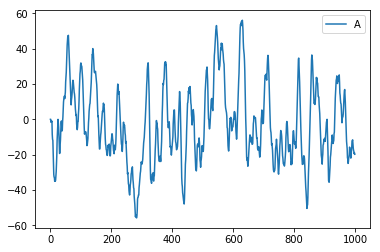

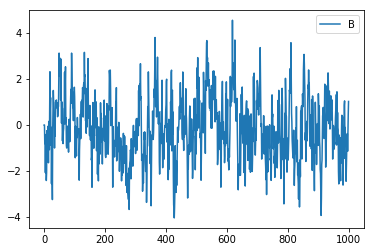

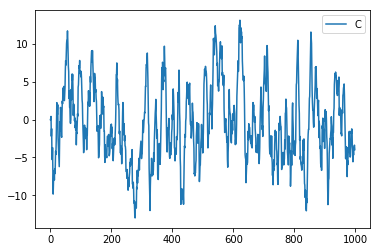

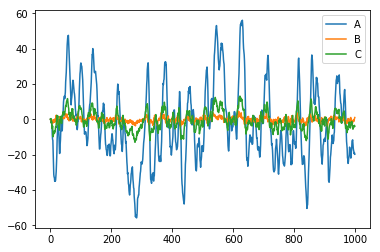

In [7]:
A=A_series.values
B=B_series.values
C=C_series.values

pyplot.plot(A , label='A')
pyplot.legend()
pyplot.show()
pyplot.plot(B , label='B')
pyplot.legend()
pyplot.show()
pyplot.plot(C , label='C')
pyplot.legend()
pyplot.show()

pyplot.plot(A , label='A')
pyplot.plot(B , label='B')
pyplot.plot(C , label='C')
pyplot.legend()
pyplot.show()

## Test of stationarity for series

In [8]:
result = adfuller(A)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))## Test of stationarity for series

ADF Statistics: -5.920278
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [9]:
result = adfuller(B)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: -9.941721
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [10]:
result = adfuller(C)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: -7.706729
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


It shows all three series of A, B and C are stationary.

##  <font color='blue' size=4> DataFrame the series and create a VAR model </font>

In [11]:
d={'A':A , 'B':B , 'C':C }
df= DataFrame(data=d)

model= VAR(df)

##  <font color='blue' size=4> Determine optimum lag order (p) by either: <br>Lag order selection </font>

In [12]:
lag_order = model.select_order(15)
print()
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.543       8.558       5131.       8.549
1       0.2952      0.3548       1.343      0.3179
2     0.02932*     0.1336*      1.030*    0.06900*
3      0.03951      0.1885       1.040     0.09619
4      0.04831      0.2420       1.049      0.1220
5      0.05904      0.2975       1.061      0.1497
6      0.07068      0.3538       1.073      0.1784
7      0.08682      0.4147       1.091      0.2115
8      0.09559      0.4681       1.100      0.2373
9      0.09996      0.5172       1.105      0.2587
10      0.1029      0.5649       1.108      0.2786
11      0.1147      0.6213       1.122      0.3074
12      0.1244      0.6758       1.133      0.3342
13      0.1273      0.7234       1.136      0.3540
14      0.1357      0.7765       1.146      0.3794
15      0.1421      0.8276       1.153      0.4028
------------------------------

It shows we could select VAR (2).

##  <font color='blue' size=4> Determine optimum lag order (p) by either: <br> Perform model fits at different lag orders to find lowest AIC </font>

In [13]:
aic_list=[]
for lag in range(1,15):
    var_res=model.fit(lag)
    aic_list.append(var_res.aic)

lowest_AIC= min(aic_list)    
p = aic_list.index(lowest_AIC) + 1
print("The lowest value of AIC is %.3f that has been seen for lag order of %d." %(lowest_AIC,p))

The lowest value of AIC is 0.047 that has been seen for lag order of 2.


##  <font color='blue' size=4> Model fit at optimum lag order and get results </font>

In [14]:
results=model.fit(p)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Dec, 2018
Time:                     19:46:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.150727
Nobs:                     998.000    HQIC:                 0.0867368
Log likelihood:          -4251.00    FPE:                    1.04865
AIC:                    0.0474994    Det(Omega_mle):         1.02689
--------------------------------------------------------------------
Results for equation A
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.021805         0.032702           -0.667           0.505
L1.A          0.506941         0.029924           16.941           0.000
L1.B          0.019381         0.032257            0.601           0.548
L1.C          1.036461 

##  <font color='blue' size=4> Use results to find roots (number of roots = K*p) </font>

In [15]:
nroots=K*p
print()
print('Roots=')
for i in range(0, nroots):
    print(VARResults.roots(results)[i])
print()
print('Moduli=')
for i in range(0,nroots):
    print(np.absolute(VARResults.roots(results)[i]))


Roots=
(-5.038356099006579-0j)
(-2.7597975398912244+0.9514553898601942j)
(-2.7597975398912244-0.9514553898601942j)
(1.2951020335981105+0.2445593762766852j)
(1.2951020335981105-0.2445593762766852j)
(1.144089199970433-0j)

Moduli=
5.038356099006579
2.9192036277182973
2.9192036277182973
1.3179903512373687
1.3179903512373687
1.144089199970433


##  <font color='blue' size=4> Observe the roots: <br>-Is the model stationary? <br>-Is the model cointegrated? </font>

All roots are outside of unit circle, so all series are stationary. <br>
__Our Model is Stationary.__
    

##  <font color='blue' size=4> Investigate Granger causality between series combinations (if any) </font>

In [16]:
grangercausalitytests(df[['A','B']],3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=393.9525, p=0.0000  , df=1
likelihood ratio test: chi2=332.0937, p=0.0000  , df=1
parameter F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=649.0487, p=0.0000  , df=2
likelihood ratio test: chi2=499.9850, p=0.0000  , df=2
parameter F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1095.5571, p=0.0000  , df=3
likelihood ratio test: chi2=739.1671, p=0.0000  , df=3
parameter F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (392.76945207218625, 6.0142896769342264e-74, 996.0, 1),
   'ssr_chi2test': (393.95249259047597, 1.1413683085281124e-87, 1),
   'lrtest': (332.0936640736454, 3.363479848093831e-74, 1),
   'params_ftest': (392.7694520721861, 6.0142896769342264e-74, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (322.8984646015281, 9.409555871100326e-109, 993.0, 2),
   'ssr_chi2test': (649.0486760771904, 1.1504579420230384e-141, 2),
   'lrtest': (499.9850338019128, 2.689238950068241e-109, 2),
   'params_ftest': (322.8984646015279, 9.409555871100861e-109, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (362.62170661965297, 7.564754388358369e-159, 990.0, 3),
   'ssr_chi2test': (1095.5570954539212, 3.3492908238909066e-237, 3),
   'lrtest': (739.1671438367075, 6.742048313468656e-160, 3),
   'params_ftest': (362.6217066196521, 7.564754388362669e-159, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.,

The time series of B Granger causes the time series of A. 

In [17]:
grangercausalitytests(df[['B','A']],3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=3.0289  , p=0.0818  , df=1
likelihood ratio test: chi2=3.0243  , p=0.0820  , df=1
parameter F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=0.2813  , p=0.8688  , df=2
likelihood ratio test: chi2=0.2812  , p=0.8688  , df=2
parameter F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4.4277  , p=0.2188  , df=3
likelihood ratio test: chi2=4.4179  , p=0.2197  , df=3
parameter F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (3.0198106082919587, 0.08256215465647816, 996.0, 1),
   'ssr_chi2test': (3.0289064233771756, 0.0817931277158338, 1),
   'lrtest': (3.0243239547589837, 0.08202449929611362, 1),
   'params_ftest': (3.0198106082920266, 0.08256215465647816, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.13993308301698912, 0.8694335534094494, 993.0, 2),
   'ssr_chi2test': (0.281275361230524, 0.8688040392232325, 2),
   'lrtest': (0.28123573148741343, 0.8688212546342364, 2),
   'params_ftest': (0.13993308301707727, 0.8694335534094016, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.465552945793911, 0.22239460858463453, 990.0, 3),
   'ssr_chi2test': (4.427746324110695, 0.21882640777511117, 3),
   'lrtest': (4.417943372472109, 0.21972737592450597, 3),
   'params_ftest': (1.4655529457939007, 0.22239460858463725, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

The time series of A does not  Granger cause the time series of B. 

In [18]:
grangercausalitytests(df[['A','C']],3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=10087.8161, p=0.0000  , df=1
likelihood ratio test: chi2=2404.3504, p=0.0000  , df=1
parameter F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=4412.2903, p=0.0000  , df=2
likelihood ratio test: chi2=1686.9242, p=0.0000  , df=2
parameter F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4258.4812, p=0.0000  , df=3
likelihood ratio test: chi2=1657.2892, p=0.0000  , df=3
parameter F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (10057.522401555507, 0.0, 996.0, 1),
   'ssr_chi2test': (10087.816143728865, 0.0, 1),
   'lrtest': (2404.3504107687413, 0.0, 1),
   'params_ftest': (10057.522401555507, 0.0, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2195.0923348473298, 0.0, 993.0, 2),
   'ssr_chi2test': (4412.29033268406, 0.0, 2),
   'lrtest': (1686.9241504995698, 0.0, 2),
   'params_ftest': (2195.0923348473298, 0.0, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1409.5273751602806, 0.0, 990.0, 3),
   'ssr_chi2test': (4258.481191014545, 0.0, 3),
   'lrtest': (1657.2892491484672, 0.0, 3),
   'params_ftest': (1409.5273751602788, 0.0, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

The time series of C Granger causes the time series of A.

In [19]:
grangercausalitytests(df[['C','A']],3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=51.7439 , p=0.0000  , df=1
likelihood ratio test: chi2=50.4484 , p=0.0000  , df=1
parameter F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=30.7669 , p=0.0000  , df=2
likelihood ratio test: chi2=30.3021 , p=0.0000  , df=2
parameter F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1.3948  , p=0.7067  , df=3
likelihood ratio test: chi2=1.3939  , p=0.7070  , df=3
parameter F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (51.588513929732315, 1.3386221290205073e-12, 996.0, 1),
   'ssr_chi2test': (51.74390101988211, 6.323294244431706e-13, 1),
   'lrtest': (50.448391922524934, 1.2234000932016274e-12, 1),
   'params_ftest': (51.58851392973216, 1.3386221290205073e-12, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (15.306361362108108, 2.8375213797389435e-07, 993.0, 2),
   'ssr_chi2test': (30.76686533612063, 2.0847792678294185e-07, 2),
   'lrtest': (30.302143814707506, 2.6301049322944197e-07, 2),
   'params_ftest': (15.306361362107964, 2.8375213797394274e-07, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.461682401097439, 0.7091067248560956, 990.0, 3),
   'ssr_chi2test': (1.394840466345899, 0.7067445991402999, 3),
   'lrtest': (1.39386565832001, 0.7069732830533872, 3),
   'params_ftest': (0.46168240109726183, 0.7091067248561991, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.]

The time series of A does not Granger causes the time series of C after third lag.

In [20]:
grangercausalitytests(df[['B','C']],3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=16.4288 , p=0.0001  , df=1
likelihood ratio test: chi2=16.2952 , p=0.0001  , df=1
parameter F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=2.4112  , p=0.2995  , df=2
likelihood ratio test: chi2=2.4083  , p=0.2999  , df=2
parameter F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=3.1304  , p=0.3720  , df=3
likelihood ratio test: chi2=3.1255  , p=0.3727  , df=3
parameter F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (16.379480774348448, 5.585892324377785e-05, 996.0, 1),
   'ssr_chi2test': (16.428816559813352, 5.051148016287925e-05, 1),
   'lrtest': (16.29519147434985, 5.4201318493818766e-05, 1),
   'params_ftest': (16.37948077434857, 5.58589232437713e-05, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.199570373774899, 0.30175990608199643, 993.0, 2),
   'ssr_chi2test': (2.4112210131467258, 0.2995090914165379, 2),
   'lrtest': (2.408312877319986, 0.2999449147577086, 2),
   'params_ftest': (1.1995703737750287, 0.3017599060819696, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.03612814457042, 0.3757057742490666, 990.0, 3),
   'ssr_chi2test': (3.1303629095051786, 0.37195922146733545, 3),
   'lrtest': (3.1254588429983414, 0.3726834513052497, 3),
   'params_ftest': (1.0361281445703785, 0.3757057742491057, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

The time series of C does not Granger cause the time series of B.

In [21]:
grangercausalitytests(df[['C','B']],3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=1400.5085, p=0.0000  , df=1
likelihood ratio test: chi2=875.3882, p=0.0000  , df=1
parameter F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=1669.6793, p=0.0000  , df=2
likelihood ratio test: chi2=981.2445, p=0.0000  , df=2
parameter F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1546.0646, p=0.0000  , df=3
likelihood ratio test: chi2=933.5653, p=0.0000  , df=3
parameter F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (1396.3027704948286, 1.004664385121521e-191, 996.0, 1),
   'ssr_chi2test': (1400.5085017312588, 1.6290355442601956e-306, 1),
   'lrtest': (875.3881613438762, 2.1989786962275603e-192, 1),
   'params_ftest': (1396.3027704948292, 1.0046643851214069e-191, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (830.6570651119688, 9.83955541795573e-213, 993.0, 2),
   'ssr_chi2test': (1669.6792567608152, 0.0, 2),
   'lrtest': (981.2444830820396, 8.423019376061999e-214, 2),
   'params_ftest': (830.6570651119648, 9.839555417969154e-213, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (511.73652187542774, 9.874137585577581e-201, 990.0, 3),
   'ssr_chi2test': (1546.0645827569742, 0.0, 3),
   'lrtest': (933.5652682501864, 4.638254883602729e-202, 3),
   'params_ftest': (511.7365218754272, 9.874137585579826e-201, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

The time series of B Granger causes the time series of C. <br>
<br>
Totally:<br>
-  B Granger causes both of A and C. 
-  C Granger causes A.

##  <font color='blue' size=4> Use IRF plots to confirm your causality conclusions </font>

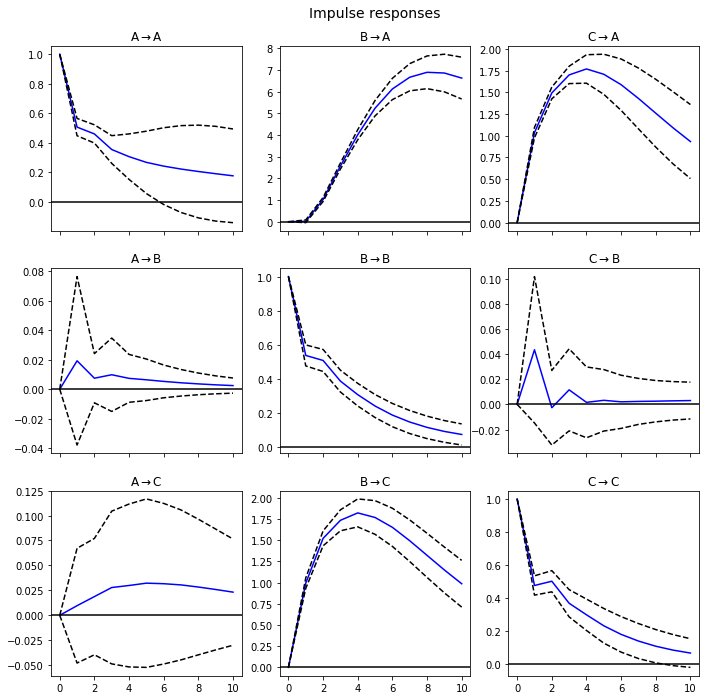

In [22]:
irf=results.irf(10)
irf.plot(orth=False)
pyplot.show()

It shows valid causalities of B->A , B->C and C->A, same to Granger Causality Test. 

##  <font color='blue' size=4> Order the variables (list series in decreasing order of exogeneity) </font>

1. B <br>
2. C <br>
3. A 


##  <font color='blue' size=4> Whether VAR or VECM model, perform a dynamic forecast 10 steps forward and plot </font>


Lag order = 2

forecast_values
[[-1.94104641e+01  5.03963569e-01 -1.36313418e+00]
 [-1.69942919e+01  5.03033660e-01 -4.43397126e-01]
 [-1.34996894e+01  3.19501467e-01  3.24082263e-01]
 [-1.00331316e+01  2.28675337e-01  7.20005734e-01]
 [-6.82304793e+00  1.34922583e-01  8.92680897e-01]
 [-4.15819446e+00  6.63481920e-02  9.19410233e-01]
 [-2.07581668e+00  1.21459016e-02  8.47997580e-01]
 [-5.65396328e-01 -2.85649275e-02  7.24565568e-01]
 [ 4.41898862e-01 -5.86457875e-02  5.75673601e-01]
 [ 1.03234165e+00 -8.05158007e-02  4.21448139e-01]]


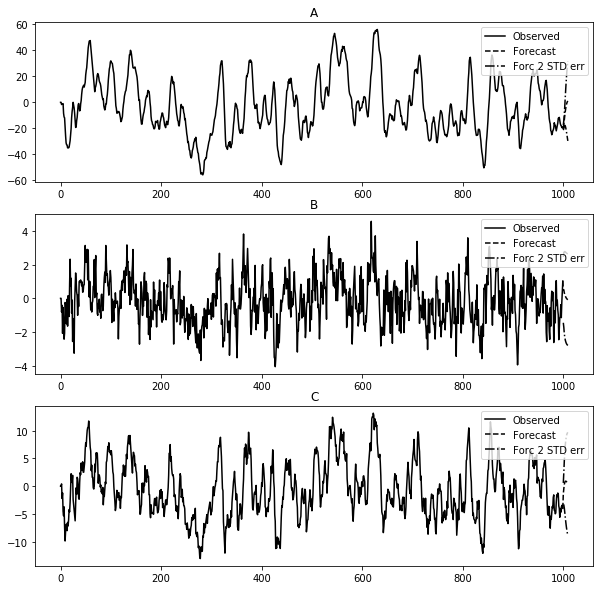

In [23]:
lag_order=results.k_ar
print()
print("Lag order =", lag_order)
forecast_values=results.forecast(df.values[-2:],10)
print()
print("forecast_values")
print(forecast_values)

results.plot_forecast(10)
pyplot.show()

# <font color='blue' size=4> Number 2 </font> 

##  <font color='blue' size=4> Read in the series 'X.csv', 'Y.csv' , 'Z.csv' </font>

In [24]:
#Reading time series 
X_series = read_csv('X.csv', header=0, index_col=0, squeeze=True)
Y_series = read_csv('Y.csv', header=0, index_col=0, squeeze=True)
Z_series = read_csv('Z.csv', header=0, index_col=0, squeeze=True)

K=3 #Number of Series

##  <font color='blue' size=4> Plot the data and observe </font>

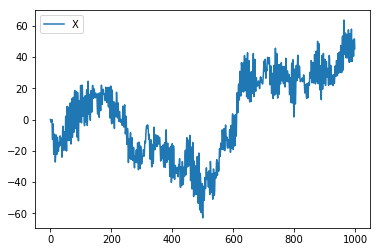

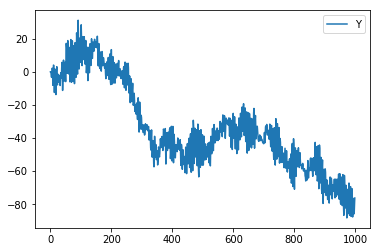

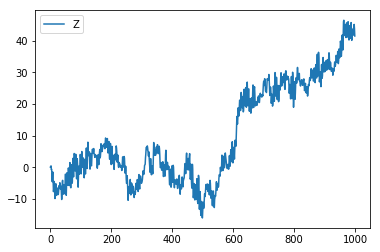

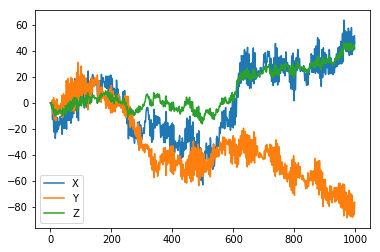

In [25]:
X=X_series.values
Y=Y_series.values
Z=Z_series.values

pyplot.plot(X , label='X')
pyplot.legend()
pyplot.show()
pyplot.plot(Y , label='Y')
pyplot.legend()
pyplot.show()
pyplot.plot(Z , label='Z')
pyplot.legend()
pyplot.show()

pyplot.plot(X , label='X')
pyplot.plot(Y , label='Y')
pyplot.plot(Z , label='Z')
pyplot.legend()
pyplot.show()

## Test of stationarity for series

    Original time series   

ADF Statistics: -0.717116
p-value: 0.842266
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


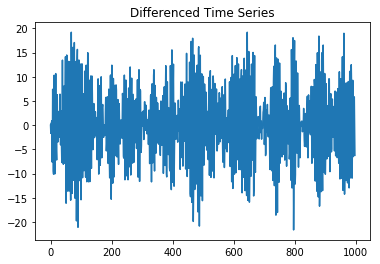

    Differenced Time Series   

ADF Statistics: -19.416520
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [26]:
result = adfuller(X)

print('    Original time series   ')
print()
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

diff= list()

for i in range(1,len(X)):
    value=X[i]-X[i-1]
    diff.append(value) 
    
pyplot.plot(diff)
pyplot.title('Differenced Time Series')
pyplot.show()

result = adfuller(diff)
print('    Differenced Time Series   ')
print()
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

    Original time series   

ADF Statistics: -0.119334
p-value: 0.947478
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


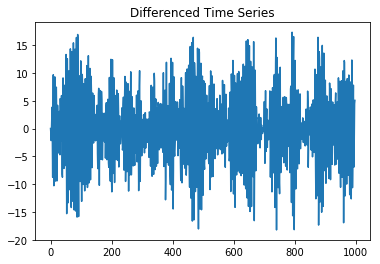

    Differenced Time Series   

ADF Statistics: -26.667469
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [27]:
result = adfuller(Y)

print('    Original time series   ')
print()
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

diff= list()

for i in range(1,len(Y)):
    value=Y[i]-Y[i-1]
    diff.append(value) 
    
pyplot.plot(diff)
pyplot.title('Differenced Time Series')
pyplot.show()

result = adfuller(diff)
print('    Differenced Time Series   ')
print()
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

    Original time series   

ADF Statistics: -0.094503
p-value: 0.949983
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


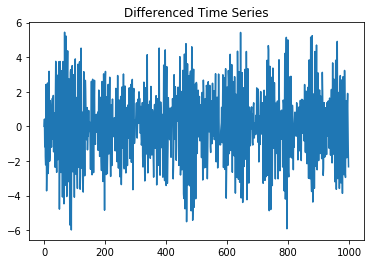

    Differenced Time Series   

ADF Statistics: -12.600887
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [28]:
result = adfuller(Z)

print('    Original time series   ')
print()
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

diff= list()

for i in range(1,len(Z)):
    value=Z[i]-Z[i-1]
    diff.append(value) 
    
pyplot.plot(diff)
pyplot.title('Differenced Time Series')
pyplot.show()

result = adfuller(diff)
print('    Differenced Time Series   ')
print()
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

It shows series would be stationary by 1 level of differencing, so we need to apply VECM model.

##  <font color='blue' size=4> DataFrame the series and create a VAR model </font>

In [29]:
d={'X':X , 'Y':Y , 'Z':Z }
df= DataFrame(data=d)

model= VAR(df)

##  <font color='blue' size=4> Determine optimum lag order (p) by either: <br>-Lag order selection </font>

In [30]:
lag_order = model.select_order(15)
print()
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.65       15.66   6.259e+06       15.66
1        3.532       3.591       34.18       3.554
2     0.02254*     0.1268*      1.023*    0.06221*
3      0.03348      0.1825       1.034     0.09016
4      0.04409      0.2378       1.045      0.1178
5      0.05314      0.2916       1.055      0.1438
6      0.06478      0.3479       1.067      0.1725
7      0.07594      0.4038       1.079      0.2006
8      0.09108      0.4636       1.095      0.2328
9       0.1015      0.5187       1.107      0.2602
10      0.1017      0.5637       1.107      0.2774
11      0.1120      0.6186       1.119      0.3047
12      0.1233      0.6747       1.131      0.3330
13      0.1307      0.7268       1.140      0.3575
14      0.1401      0.7809       1.151      0.3838
15      0.1414      0.8268       1.152      0.4021
------------------------------

It shows we could select VAR (2).

##  <font color='blue' size=4> Determine optimum lag order (p) by either: <br>-Perform model fits at different lag orders to find lowest AIC </font>

In [31]:
aic_list=[]
for lag in range(1,15):
    var_res=model.fit(lag)
    aic_list.append(var_res.aic)

lowest_AIC= min(aic_list)    
p = aic_list.index(lowest_AIC) + 1
print("The lowest value of AIC is %.3f that has been seen for lag order of %d." %(lowest_AIC,p))

The lowest value of AIC is 0.040 that has been seen for lag order of 2.


##  <font color='blue' size=4> Model fit at optimum lag order and get results </font>

In [32]:
results=model.fit(p)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Dec, 2018
Time:                     19:46:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.143403
Nobs:                     998.000    HQIC:                 0.0794136
Log likelihood:          -4247.35    FPE:                    1.04099
AIC:                    0.0401762    Det(Omega_mle):         1.01939
--------------------------------------------------------------------
Results for equation X
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.068742         0.053248           -1.291           0.197
L1.X          0.703151         0.008206           85.692           0.000
L1.Y          0.224385         0.029645            7.569           0.000
L1.Z          2.023227 

##  <font color='blue' size=4> Use results to find roots (number of roots = K*p) </font>

In [33]:
nroots=K*p
print()
print('Roots=')
for i in range(0, nroots):
    print(VARResults.roots(results)[i])
print()
print('Moduli=')
for i in range(0,nroots):
    print(np.absolute(VARResults.roots(results)[i]))


Roots=
(21.584291192040467-0j)
(2.2958277878267985-0j)
(0.2885975818918367+0.9886262824620383j)
(0.2885975818918367-0.9886262824620383j)
(1.0042965693899337-0j)
(0.999305268946321-0j)

Moduli=
21.584291192040467
2.2958277878267985
1.0298885816672236
1.0298885816672236
1.0042965693899337
0.999305268946321


##  <font color='blue' size=4> Observe the roots: <br> -Is the model stationary? <br>-Is the model cointegrated? </font>

We have 4 unity roots, so model is not stationary, but it could be cointegrated, so we check for cointegration.

In [670]:
results = coint(df[['X']] , df[['Y','Z']], trend='nc' ,maxlag = 15 , autolag=None)
print()
print("Cointegration Test:")
print('t-statistic of unit-root test on residuals =', results[0])
print('MacKinnon`s approximate, asymptotic p_value =', results[1])
print('Critical values for the test statistic:')
print('     1%  =', results[2][0])
print('     5%  =', results[2][0])
print('     10% =', results[2][0])
print()


Cointegration Test:
t-statistic of unit-root test on residuals = -3.7083899878789635
MacKinnon`s approximate, asymptotic p_value = 0.016057514985678988
Critical values for the test statistic:
     1%  = nan
     5%  = nan
     10% = nan



The p_value shows series are cointegrated.

##  <font color='blue' size=4> Confirming lag order by VECM model </font>

In [671]:
lag_order = select_order(data=df, maxlags=15, deterministic="nc")
print()
print(lag_order.summary())
print()
print('AIC lag order =', lag_order.aic)
print()


 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.534       3.593       34.25       3.556
1     0.02397*     0.1284*      1.024*    0.06368*
2      0.03512      0.1843       1.036     0.09185
3      0.04556      0.2394       1.047      0.1193
4      0.05483      0.2934       1.056      0.1456
5      0.06650      0.3499       1.069      0.1743
6      0.07750      0.4056       1.081      0.2023
7      0.09266      0.4655       1.097      0.2345
8       0.1030      0.5206       1.109      0.2619
9       0.1032      0.5655       1.109      0.2790
10      0.1136      0.6207       1.120      0.3065
11      0.1250      0.6768       1.133      0.3349
12      0.1324      0.7289       1.142      0.3593
13      0.1417      0.7830       1.152      0.3857
14      0.1430      0.8290       1.154      0.4040
15      0.1519      0.8827       1.164      0.4299
------------------------------

We had VAR(2) model that is consistent with VECM(1).

##  <font color='blue' size=4> Perform a Johansen cointegration test. What is the cointegration rank? </font>

In [672]:
rank_test=select_coint_rank(df,-1, lag_order.aic, method="trace", signif=0.05)
print(rank_test)
print()
print('Rank=', rank_test.rank)
print()

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          796.5          24.28
  1   3          5.444          12.32
-------------------------------------

Rank= 1



It shows rank of cointegration is 1 or VECM(1).

##  <font color='blue' size=4> Create a VECM model (with no deterministic terms) and fit </font>

In [673]:
model = VECM(df, deterministic='nc', k_ar_diff= lag_order.aic, coint_rank=rank_test.rank)
vecm_res = model.fit()
print(vecm_res.summary())
print()
print('Alpha=')
print(vecm_res.alpha)
print('Beta =')
print(vecm_res.beta)
print()

Det. terms outside the coint. relation & lagged endog. parameters for equation X
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.X           0.5314      0.027     19.648      0.000       0.478       0.584
L1.Y          -0.1870      0.017    -10.934      0.000      -0.221      -0.153
L1.Z           0.3653      0.077      4.770      0.000       0.215       0.515
Det. terms outside the coint. relation & lagged endog. parameters for equation Y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.X           0.3405      0.026     12.921      0.000       0.289       0.392
L1.Y           0.2365      0.017     14.189      0.000       0.204       0.269
L1.Z          -0.4886      0.075     -6.549      0.000      -0.635      -0.342
Det. terms outside the coint. relation & lagged 

##  <font color='blue' size=4> Whether VAR or VECM model, perform a dynamic forecast 10 steps forward and plot </font>

forecat:
[[ 39.9615332  -75.91121098  42.34857073]
 [ 43.03161751 -81.9876221   44.03728966]
 [ 49.82762548 -85.58794554  44.17523802]
 [ 50.68590667 -81.76329636  42.66632223]
 [ 44.77012499 -76.26196758  41.71947122]
 [ 40.75179263 -76.86209831  42.62853177]
 [ 44.14602263 -82.36972802  44.01667208]
 [ 49.78311419 -84.79921301  43.91554146]
 [ 49.65210257 -80.92856338  42.55210138]
 [ 44.26723384 -76.53147879  41.90549567]]
lower:
[[ 37.96980134 -77.85185489  40.39218427]
 [ 38.36234913 -86.51303216  40.64579255]
 [ 41.34366227 -91.87507871  40.0431094 ]
 [ 40.42125975 -88.56669744  38.30630215]
 [ 34.18729479 -83.87448647  37.16034941]
 [ 29.89662797 -85.04086426  37.57460791]
 [ 32.2951925  -91.51033795  38.2780227 ]
 [ 36.09390034 -94.72744604  37.75966247]
 [ 34.99222973 -91.19073035  36.23662872]
 [ 29.38816114 -87.28306462  35.4192846 ]]
upper:
[[ 41.95326505 -73.97056707  44.30495719]
 [ 47.7008859  -77.46221204  47.42878678]
 [ 58.31158868 -79.30081237  48.30736664]
 [ 60.950

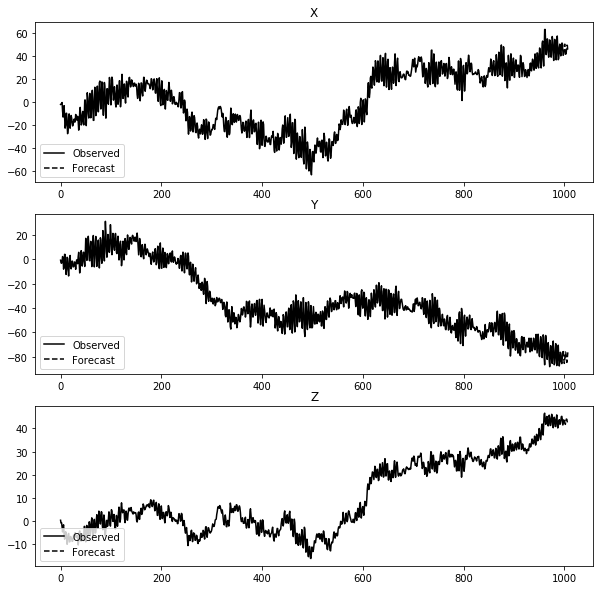

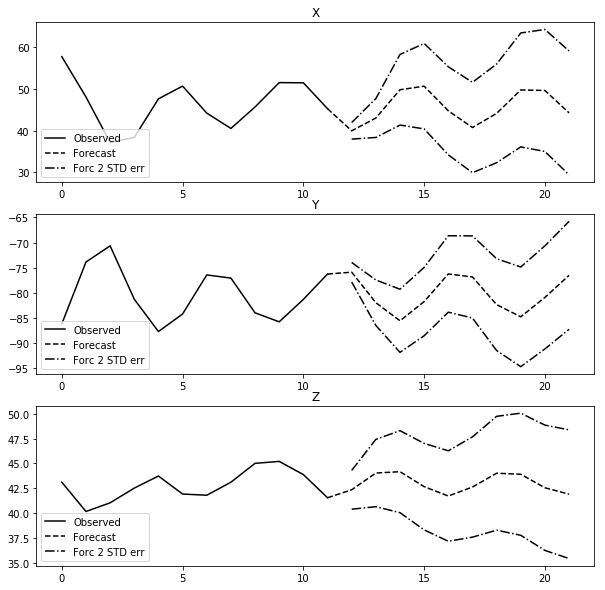

In [674]:
#vecm_res.predict(steps=10, alpha=0.05)
for text, values in zip(('forecat', 'lower', 'upper'), \
                        vecm_res.predict(steps=10, alpha=0.05)):
    print(text+":", values, sep='\n')
vecm_res.plot_forecast(steps=10, plot_conf_int= False)
vecm_res.plot_forecast(steps=10, n_last_obs=12)
pyplot.show()